**Dataset from**
https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./loan_data.csv")
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [6]:
data.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [7]:
data = data.loc[data['person_age'] <= 80]
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [8]:
len(data)

44991

# Data visualization

Text(0.5, 1.0, 'Approve vs Reject')

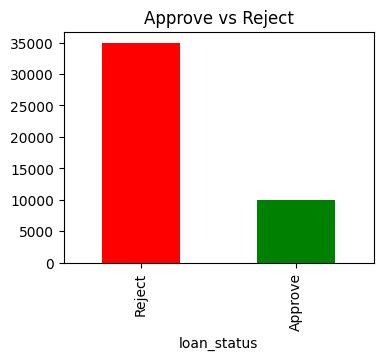

In [9]:
plt.figure(figsize=(4,3))

data['loan_status'].value_counts().plot.bar(color=["red", "green"])
plt.xticks([0,1], ["Reject", "Approve"])
plt.title("Approve vs Reject")

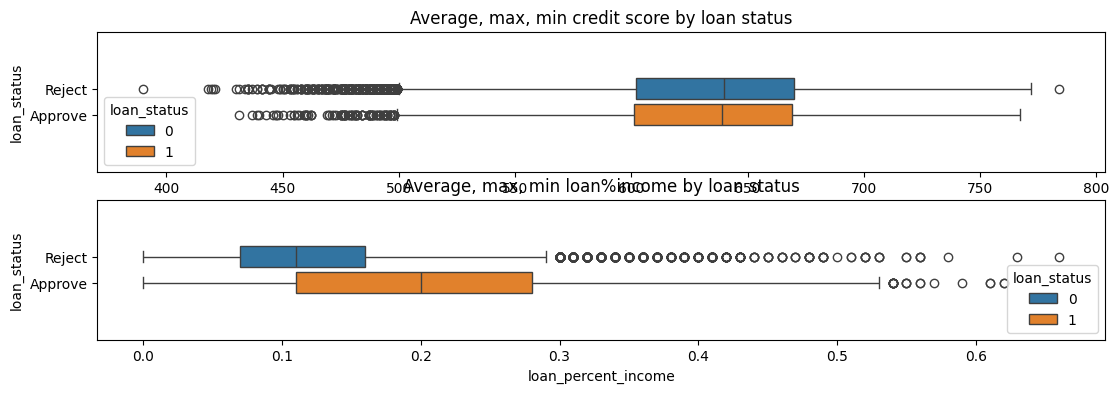

In [10]:
fig, ax = plt.subplots(2,1,figsize=(13,4))

sns.boxplot(data=data, x='credit_score', y='loan_status', hue='loan_status', ax=ax[0], orient='h')
ax[0].set_yticks([0,1], ["Reject", "Approve"])
ax[0].set_title("Average, max, min credit score by loan status")
ax[0].margins(y=1)

sns.boxplot(data=data, x='loan_percent_income', y='loan_status', hue='loan_status', ax=ax[1], orient='h')
ax[1].set_yticks([0,1], ["Reject", "Approve"])
ax[1].set_title("Average, max, min loan%income by loan status")
ax[1].margins(y=1)

Text(0.5, 1.0, 'Number of previous default by loan status')

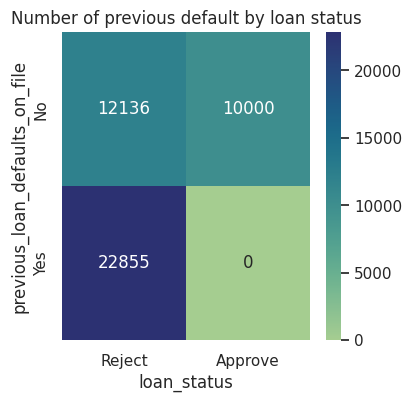

In [11]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(4,4))

default_df = data.loc[:, ['previous_loan_defaults_on_file', 'loan_status']]
default_df_pivot = default_df.value_counts().to_frame("count").pivot_table(index="previous_loan_defaults_on_file",
                                                                           columns="loan_status",
                                                                           values="count")
default_df_pivot = default_df_pivot.fillna(0)

sns.heatmap(default_df_pivot, annot=True, fmt=".0f", ax=ax, xticklabels=["Reject", "Approve"], cmap="crest")
plt.title("Number of previous default by loan status")

Text(0.5, 1.0, 'Number of people by loan status and gender')

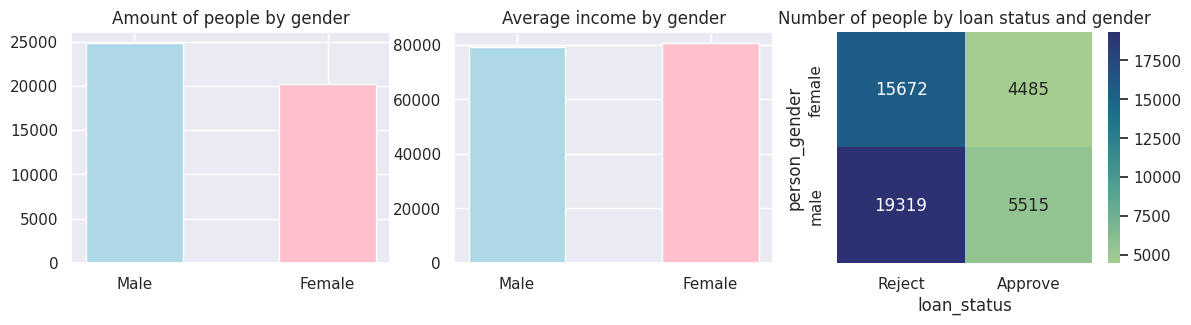

In [12]:
income_by_gender = data.groupby('person_gender')[['person_income']].mean()

fig, ax = plt.subplots(1,3,figsize=(14,3))

ax[0].bar(["Male", "Female"], data['person_gender'].value_counts(), width=0.5, align='center', color=['lightblue', 'pink'])
ax[0].set_title("Amount of people by gender")

ax[1].bar(["Male", "Female"], income_by_gender['person_income'], width=0.5, align='center', color=['lightblue', 'pink'])
ax[1].set_title("Average income by gender")

gender_df = data.loc[:, ["person_gender", "loan_status"]]
gender_df_pivot = gender_df.value_counts().to_frame("count").pivot_table(index="person_gender",
                                                                         columns="loan_status",
                                                                         values="count")

sns.heatmap(gender_df_pivot, annot=True, cmap="crest", fmt=".0f", xticklabels=["Reject", "Approve"], ax=ax[2])
ax[2].set_title("Number of people by loan status and gender")

Text(0.5, 1.0, 'Average age by gender')

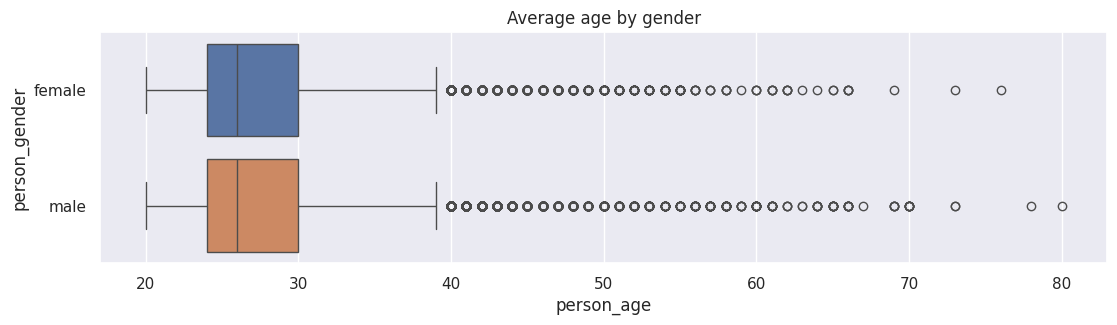

In [13]:
fig, ax = plt.subplots(figsize=(13,3))

sns.boxplot(data=data, x="person_age", y="person_gender", ax=ax, hue='person_gender')
plt.title("Average age by gender")

Text(0.5, 1.0, 'Number of home ownership')

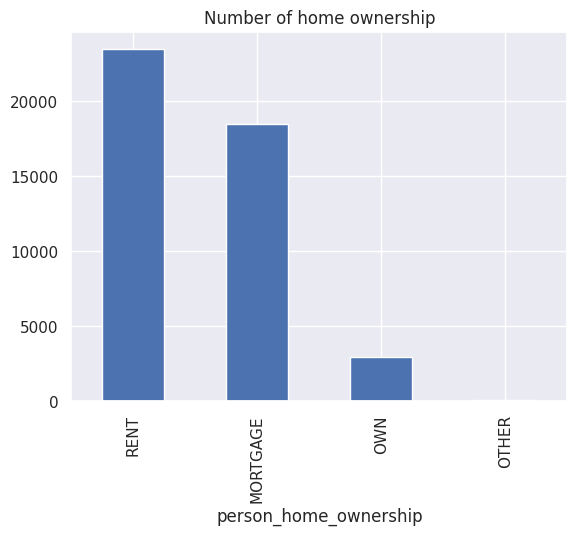

In [14]:
data['person_home_ownership'].value_counts().plot.bar()
plt.title("Number of home ownership")

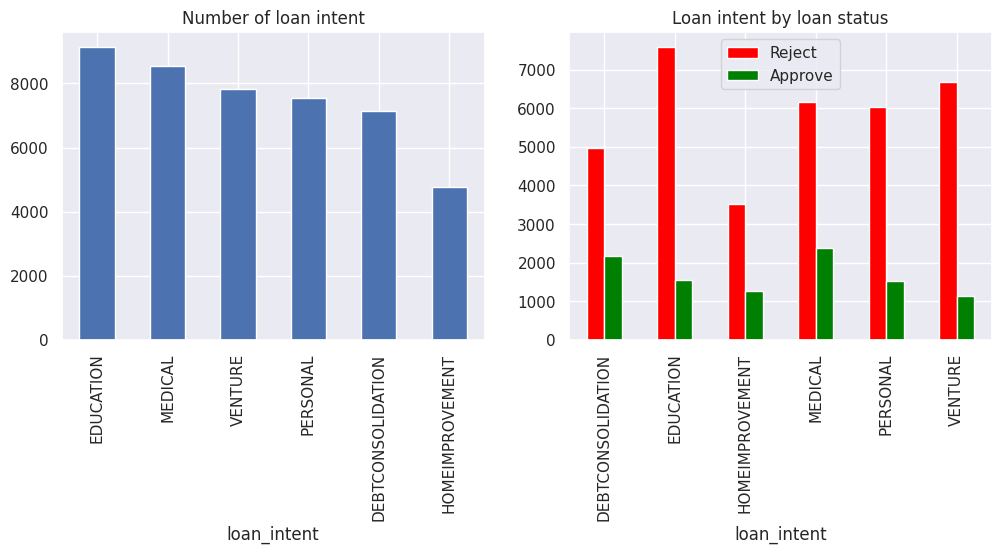

In [15]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

data['loan_intent'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Number of loan intent")

intent_df = data.loc[:, ["loan_intent", "loan_status"]]
intent_df_pivot = intent_df.value_counts().to_frame("count").pivot_table(index="loan_intent",
                                                                         columns="loan_status",
                                                                         values="count")
intent_df_pivot.plot.bar(ax=ax[1], color=["red", "green"])
ax[1].set_title("Loan intent by loan status")
ax[1].legend(["Reject", "Approve"])

Text(0.5, 1.0, 'Average interest rate')

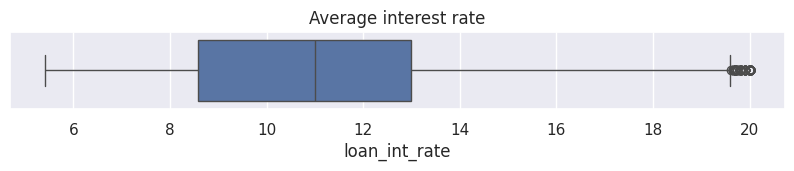

In [16]:
plt.figure(figsize=(10,1))
sns.boxplot(x=data['loan_int_rate'])
plt.title("Average interest rate")

<Axes: xlabel='loan_int_rate', ylabel='credit_score'>

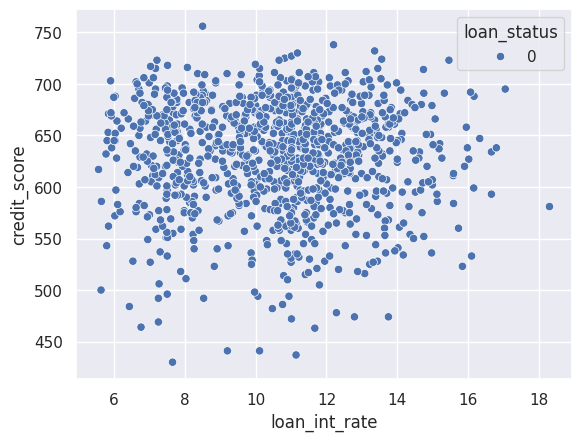

In [17]:
abitary_num = np.random.randint(0,45)*1000

interest_df = data.loc[abitary_num:abitary_num+1000, ["loan_int_rate", "credit_score", "loan_status"]]

sns.scatterplot(interest_df, x='loan_int_rate', y='credit_score', hue='loan_status')

Text(0.5, 1.0, 'Loan status by education degree')

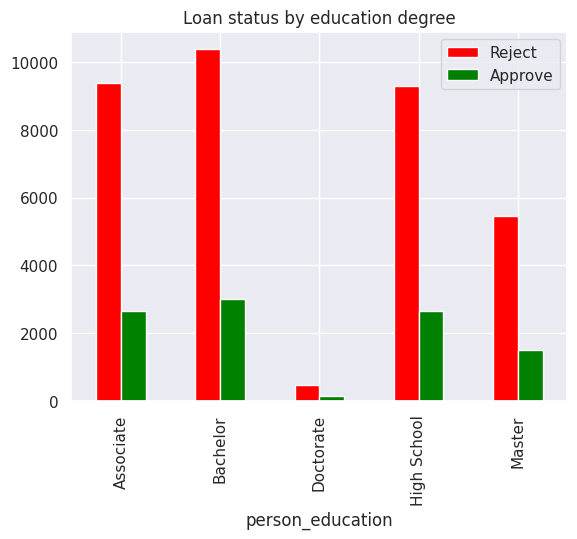

In [18]:
edu_df = data.loc[:, ["person_education", "loan_status"]]
edu_df_pivot = edu_df.value_counts().to_frame("count").pivot_table(index="person_education",
                                                                   columns="loan_status",
                                                                   values="count")

edu_df_pivot.plot.bar(color=["red", "green"])
plt.legend(["Reject", "Approve"])
plt.title("Loan status by education degree")

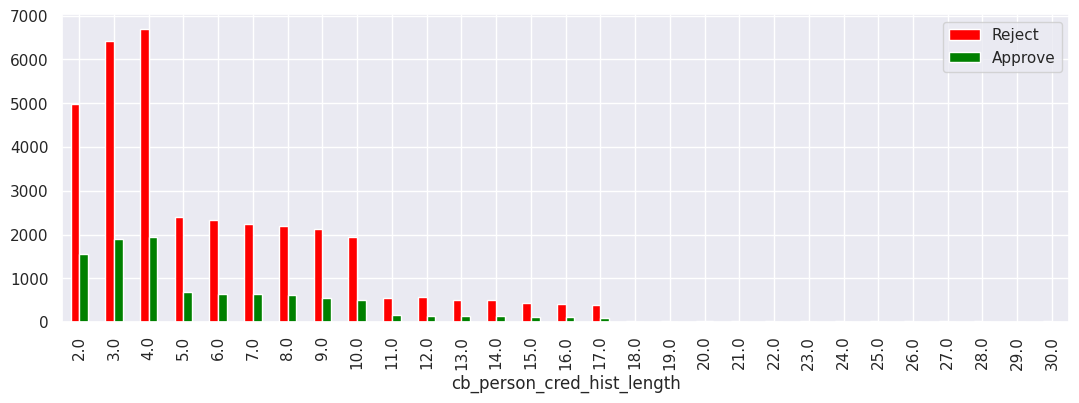

In [19]:
fig, ax = plt.subplots(figsize=(13,4))

hist_df = data.loc[:, ["cb_person_cred_hist_length", "loan_status"]]
hist_df_pivot = hist_df.value_counts().to_frame("count").pivot_table(index="cb_person_cred_hist_length",
                                                                     columns="loan_status",
                                                                     values="count")

hist_df_pivot.plot.bar(ax=ax, color=["red", "green"])
plt.legend(["Reject", "Approve"])

# Processing data

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
for key, value in data.items():
  if pd.api.types.is_object_dtype(value):
    data[key] = data[key].astype('category')
    data[key] = data[key].cat.codes

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44991 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44991 non-null  float64
 1   person_gender                   44991 non-null  int8   
 2   person_education                44991 non-null  int8   
 3   person_income                   44991 non-null  float64
 4   person_emp_exp                  44991 non-null  int64  
 5   person_home_ownership           44991 non-null  int8   
 6   loan_amnt                       44991 non-null  float64
 7   loan_intent                     44991 non-null  int8   
 8   loan_int_rate                   44991 non-null  float64
 9   loan_percent_income             44991 non-null  float64
 10  cb_person_cred_hist_length      44991 non-null  float64
 11  credit_score                    44991 non-null  int64  
 12  previous_loan_defaults_on_file  44991

In [23]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


Text(0.5, 1.0, 'features correlation')

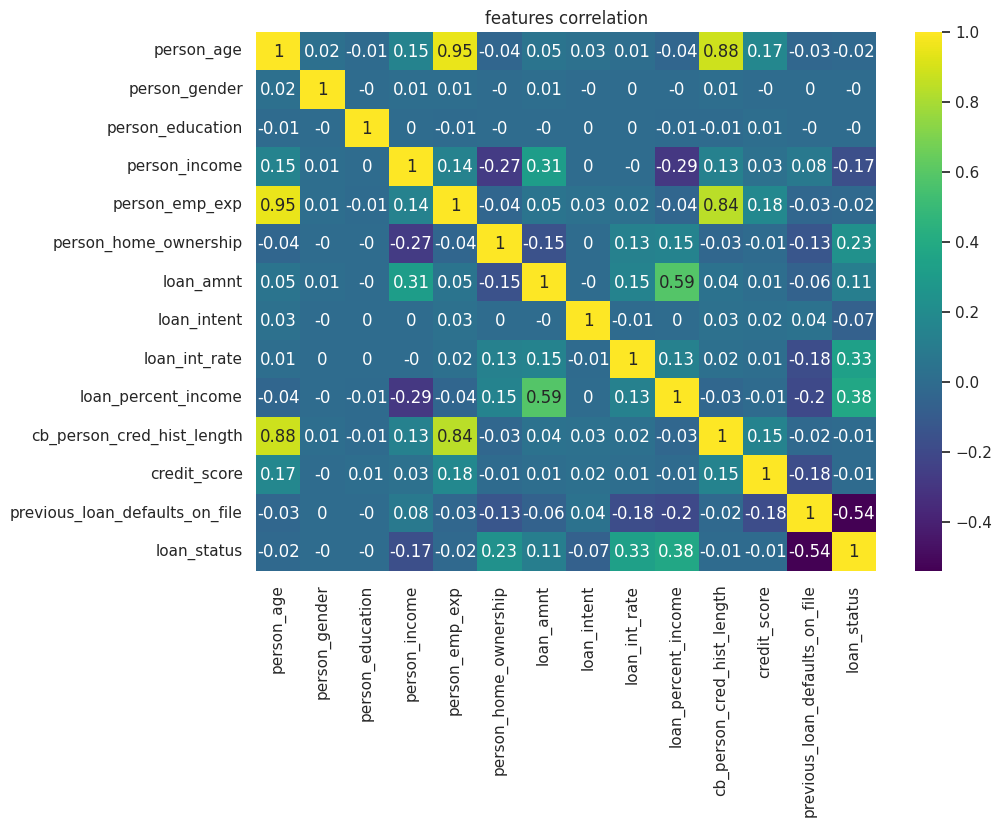

In [24]:
corr = data.corr()

plt.figure(figsize=(10,7))
sns.heatmap(round(corr,2), annot=True, cmap="viridis")
plt.title("features correlation")

In [25]:
# Remove columns highly correlated

data = data.drop(['person_emp_exp', 'cb_person_cred_hist_length'], axis=1)
data.head()

,person_age,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,3,35000.0,4,16.02,0.49,561,0,1
1,21.0,0,3,12282.0,2,1000.0,1,11.14,0.08,504,1,0
2,25.0,0,3,12438.0,0,5500.0,3,12.87,0.44,635,0,1
3,23.0,0,1,79753.0,3,35000.0,3,15.23,0.44,675,0,1
4,24.0,1,4,66135.0,3,35000.0,3,14.27,0.53,586,0,1


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
np.random.seed(42)

X = data.drop('loan_status', axis=1)
y = data['loan_status']
norm = MinMaxScaler()

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
X_train_scaled = norm.fit_transform(X_train)
X_val_scaled = norm.transform(X_val)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((35992, 11), (8999, 11), (35992,), (8999,))

# Build model

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import classification_report

## Training a model

In [29]:
# Train with non scaled data

models = {"rf": RandomForestClassifier(),
          "log": LogisticRegression(),
          "xgb": XGBClassifier()}

for name, model in models.items():
  clf = model
  clf.fit(X_train, y_train)

  print(f"{model}")
  print(f"Training accuracy : {clf.score(X_train, y_train)}")
  print(f"Validatation accuracy : {clf.score(X_val, y_val)}")
  print("===================================")

RandomForestClassifier()
Training accuracy : 1.0
Validatation accuracy : 0.9266585176130682


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
Training accuracy : 0.832268281840409
Validatation accuracy : 0.8318702078008667
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Training accuracy : 0.9677428317403868
Validatation accuracy : 0.9339926658517613


In [30]:
# Train with scaled data

models = {"rf": RandomForestClassifier(),
          "log": LogisticRegression(),
          "xgb": XGBClassifier()}

for name, model in models.items():
  clf = model
  clf.fit(X_train_scaled, y_train)

  print(f"{model}")
  print(f"Training accuracy : {clf.score(X_train_scaled, y_train)}")
  print(f"Validatation accuracy : {clf.score(X_val_scaled, y_val)}")
  print("===================================")

RandomForestClassifier()
Training accuracy : 1.0
Validatation accuracy : 0.9263251472385821
LogisticRegression()
Training accuracy : 0.8911424761058013
Validatation accuracy : 0.8905433937104122
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Training accuracy : 0.9677428317403868
Validata

In [31]:
for name, model in models.items():
  print(f"{model}")
  print(classification_report(y_val, model.predict(X_val_scaled)))
  print("========================================================")

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6987
           1       0.89      0.76      0.82      2012

    accuracy                           0.93      8999
   macro avg       0.91      0.87      0.89      8999
weighted avg       0.92      0.93      0.92      8999

LogisticRegression()
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6987
           1       0.77      0.73      0.75      2012

    accuracy                           0.89      8999
   macro avg       0.85      0.83      0.84      8999
weighted avg       0.89      0.89      0.89      8999

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=No

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

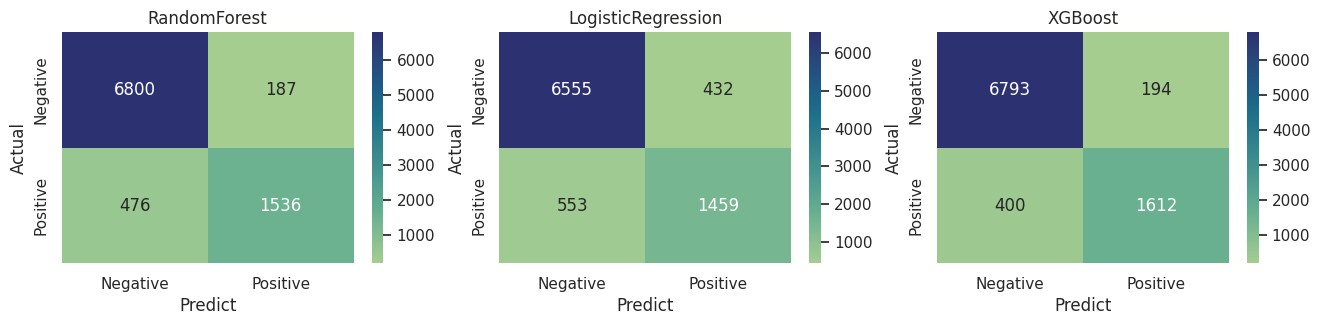

In [33]:
fig, ax = plt.subplots(1,3,figsize=(16,3))
sns.set(font_scale=1)
model_name = ["RandomForest", "LogisticRegression", "XGBoost"]
i = 0

for key, model in models.items():
  cm = confusion_matrix(y_val, models[key].predict(X_val_scaled))
  sns.heatmap(cm, ax=ax[i], annot=True, fmt=".0f", yticklabels=["Negative", "Positive"], xticklabels=["Negative", "Positive"], cmap="crest")
  ax[i].set_xlabel("Predict")
  ax[i].set_ylabel("Actual")
  ax[i].set_title(f"{model_name[i]}")
  i += 1

## Randomforest

In [34]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
rf.score(X_val, y_val)

0.9273252583620403

In [35]:
print(classification_report(rf_pred, y_val))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      7277
           1       0.77      0.89      0.82      1722

    accuracy                           0.93      8999
   macro avg       0.87      0.91      0.89      8999
weighted avg       0.93      0.93      0.93      8999



<Axes: title={'center': 'Feature importances'}>

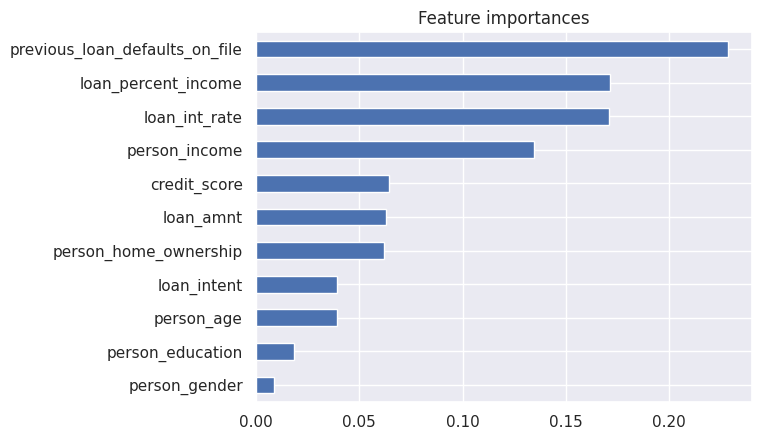

In [36]:
importance = dict(zip(data.columns, rf.feature_importances_))
importance_df = pd.DataFrame(importance, index=[0])

importance_df.T.sort_values(by=[0], ascending=True).plot.barh(legend=False, title="Feature importances")

## LogisticRegression

In [37]:
log = LogisticRegression(max_iter=1000)

log.fit(X_train, y_train)
log_pred = log.predict(X_val)
log.score(X_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8805422824758307

In [38]:
print(classification_report(log_pred, y_val))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7072
           1       0.71      0.74      0.73      1927

    accuracy                           0.88      8999
   macro avg       0.82      0.83      0.83      8999
weighted avg       0.88      0.88      0.88      8999



<Axes: title={'center': 'Coefficient'}>

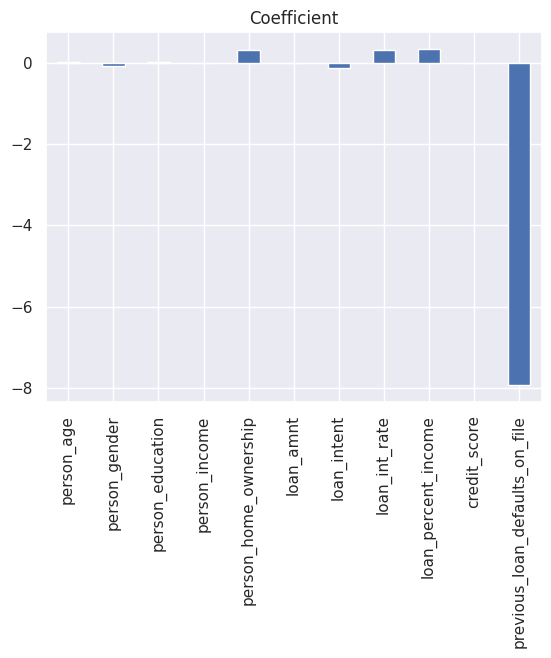

In [39]:
coef = pd.DataFrame(dict(zip(data.columns, log.coef_[0])), index=[0])

coef.T.plot.bar(legend=False, title="Coefficient")